In [1]:
import pandas as pd 
import os 
import sys 
import csv 
import numpy as np

In [2]:
df = pd.read_csv('stocks.csv')

In [3]:
df['Entry Date'] = pd.to_datetime(df['Entry Date'])

In [4]:
df['month'] = df['Entry Date'].dt.month

In [5]:
df['Profit%'] = df['Profit%'].astype('string')

In [6]:
df['Profit%'] = df['Profit%'].str.replace('%','')
df['Entry Price'] = df['Entry Price'].str.replace('$','')
df['Entry Price'] = df['Entry Price'].str.replace('*','')
df['Exit Price'] = df['Exit Price'].str.replace('$','')
df['Exit Price'] = df['Exit Price'].str.replace('*','')

/var/folders/xs/1mylbg3x4w1dg08nwy5ppd0m0000gn/T/ipykernel_88173/3921805541.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Entry Price'] = df['Entry Price'].str.replace('$','')
/var/folders/xs/1mylbg3x4w1dg08nwy5ppd0m0000gn/T/ipykernel_88173/3921805541.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Entry Price'] = df['Entry Price'].str.replace('*','')
/var/folders/xs/1mylbg3x4w1dg08nwy5ppd0m0000gn/T/ipykernel_88173/3921805541.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Exit Price'] = df['Exi

In [7]:
df['Profit%'] = df['Profit%'].astype('float')
df['Entry Price'] = df['Profit%'].astype('float')
df['Exit Price'] = df['Profit%'].astype('float')

# 1.0 Generating mean profit generated monthly 

# 2.0 Generating Viz from Performance 

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [9]:
df

,Unnamed: 0,\n\t,Symbol,Long/Short,Entry Date,Entry Price,Exit Price,Exit Date,Profit%,\n,month
0,0,\n\t,CVNA,Long,2022-06-29,17.94,17.94,07/05/2022,17.94,\n,6
1,1,\n\t,SE,Long,2022-06-29,10.68,10.68,07/05/2022,10.68,\n,6
2,2,\n\t,ASML,Short,2020-05-20,2.00,2.00,07/01/2022,2.00,\n,5
3,3,\n\t,SCO,Long,2022-06-29,14.11,14.11,06/30/2022,14.11,\n,6
4,4,\n\t,QCOM,Long,2022-06-16,11.45,11.45,06/28/2022,11.45,\n,6
...,...,...,...,...,...,...,...,...,...,...,...
132,132,\n\t,SQ,Long,2022-01-10,12.40,12.40,01/11/2022,12.40,\n,1
133,133,\n\t,PTON,Long,2022-01-03,10.28,10.28,01/11/2022,10.28,\n,1
134,134,\n\t,AFRM,Long,2022-01-10,11.44,11.44,01/11/2022,11.44,\n,1
135,135,\n\t,SE,Long,2022-01-05,10.37,10.37,01/11/2022,10.37,\n,1


In [11]:
df.groupby('month').mean('Profit%')

,Unnamed: 0,Entry Price,Exit Price,Profit%
month,,,,
1,103.766667,13.462667,13.462667,13.462667
2,77.562500,14.578125,14.578125,14.578125
3,62.750000,10.106500,10.106500,10.106500
4,39.200000,8.522667,8.522667,8.522667
5,32.653846,13.615769,13.615769,13.615769
6,30.307692,12.668462,12.668462,12.668462
7,125.500000,5.305000,5.305000,5.305000
8,105.500000,5.770000,5.770000,5.770000
9,106.500000,2.570000,2.570000,2.570000


<AxesSubplot:title={'center':'Stocks Performance 2022'}, xlabel='Months', ylabel='Total Percent%'>

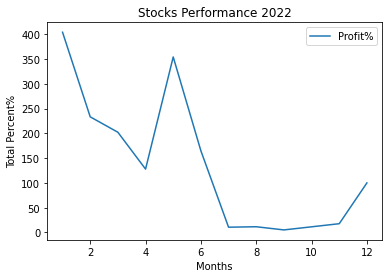

In [13]:
df.groupby(['month'])['Profit%'].sum().plot(legend=True,ylabel='Total Percent%', xlabel='Months', title='Stocks Performance 2022')
